КВБО-01-21 Румянцева Елизавета Ивановна

# 1 Задание
Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

Массив x:  [-5.         -4.09090909 -3.18181818 -2.27272727 -1.36363636 -0.45454545
  0.45454545  1.36363636  2.27272727  3.18181818  4.09090909  5.        ]
Массив y:  [6.6094379124341005, 6.408767216971949, 6.157452788691043, 5.82098055206983, 5.31015492830384, 4.211542639635731, 4.211542639635729, 5.310154928303839, 5.82098055206983, 6.157452788691043, 6.408767216971949, 6.6094379124341005]


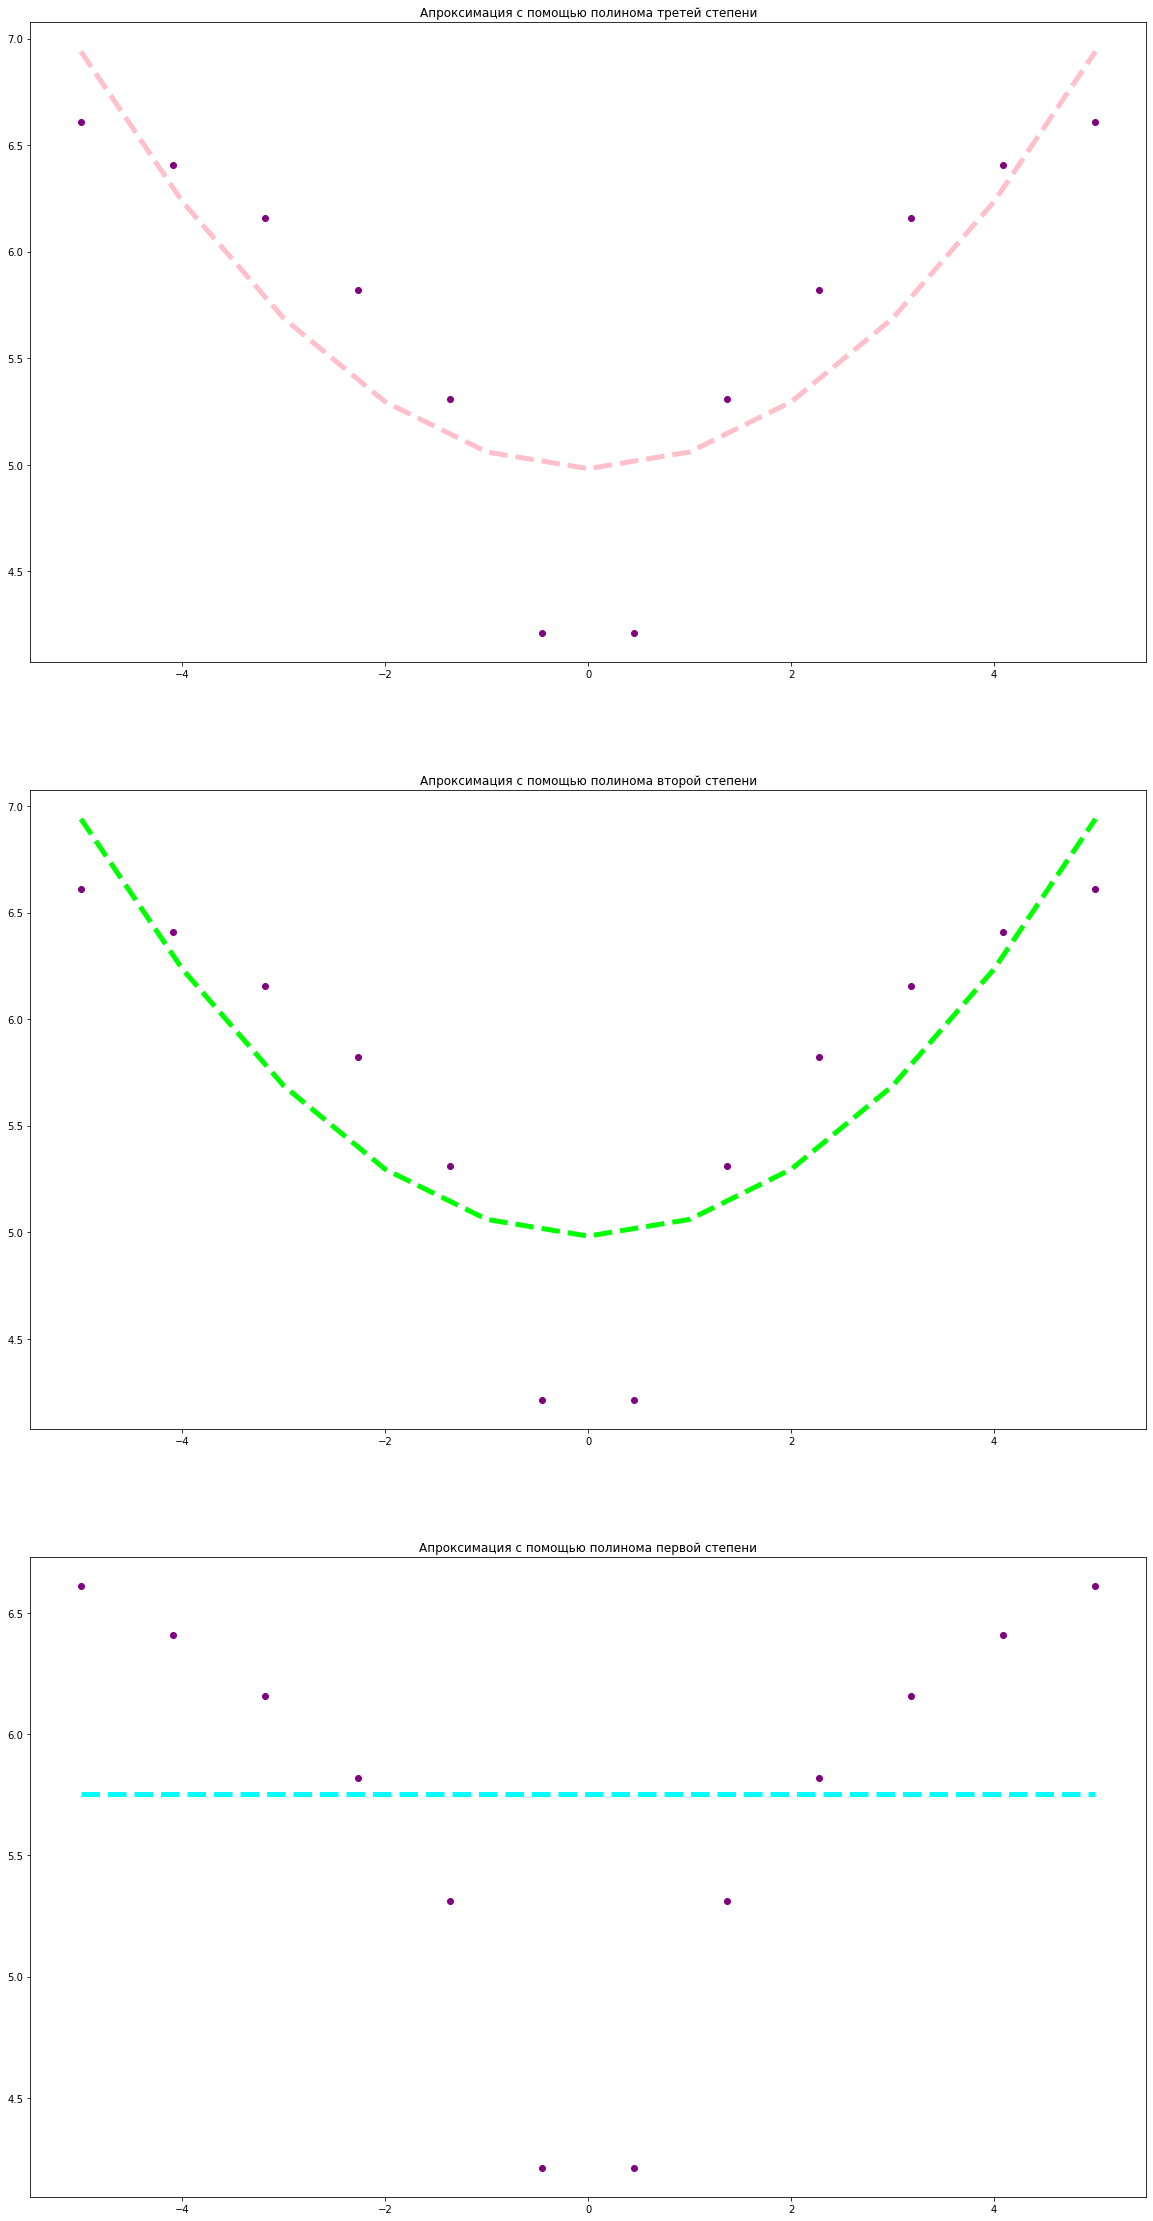

In [51]:
import numpy as np
import random
import math
def logarifmicheska(x):
    return math.log(abs(x))+5
delta=1.0
x=np.linspace(-5,5,12)# возвращает равномерно расположенные числа за указанный интервал,
#при этом учитывая начальную и  конечную точку интервала и ряд других данных
y=[]
y=[0 for i in range(12)]
for i in range(12):
    if(x[i]!=0):
        y[i]=logarifmicheska(x[i])
print('Массив x: ',x)
print('Массив y: ',y)
m1=np.vstack((x**3,x**2,x,np.ones(12))).T
m2=np.vstack((x**2,x,np.ones(12))).T
m3=np.vstack((x,np.ones(12))).T
s1=np.linalg.lstsq(m1,y,rcond=None)[0]
s2=np.linalg.lstsq(m2,y,rcond=None)[0]
s3=np.linalg.lstsq(m3,y,rcond=None)[0]
x_prec=np.linspace(-5,5,11)
fig=plt.figure(figsize=(20,40))
ax_1=fig.add_subplot(3,1,1)
ax_1.scatter(x,y,c='purple')
ax_1.plot(x_prec,s1[0]*x_prec**3+s1[1]*x_prec**2+s1[2]*x_prec+s1[3],color='pink',lw=5,ls='--')
ax_1.set_title('Апроксимация с помощью полинома третей степени')
ax_2=fig.add_subplot(3,1,2)
ax_2.scatter(x,y,c='purple')
ax_2.plot(x_prec,s2[0]*x_prec**2+s2[1]*x_prec+s2[2],color='lime',lw=5,ls='--')
ax_2.set_title('Апроксимация с помощью полинома второй степени')
ax_3=fig.add_subplot(3,1,3)
ax_3.scatter(x,y,c='purple')
ax_3.plot(x_prec,s3[0]*x_prec+s3[1],color='cyan',lw=5,ls='--')
ax_3.set_title('Апроксимация с помощью полинома первой степени')
plt.show()

# 2 Задание
Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


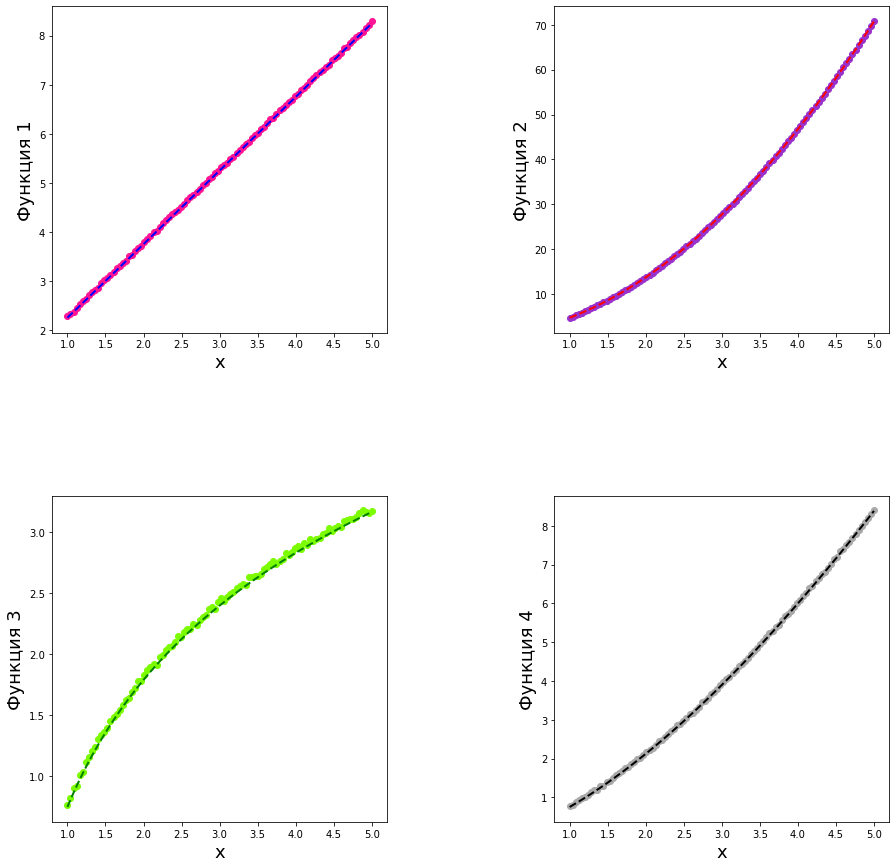


Первой функции(линейный график):  [0.78113902 1.49863659 1.        ] 
 inf 
 0.01589073540233132

Вторая функции(парабола):  [0.77826587 1.49744731 2.50048854] 
 4.028157254832223e-05 
 0.02052292670026121

Третья функции(логарифмический):  [135.0154433  -82.46651403   1.        ] 
 4.290711580927736 
 44.02259493072766

Четвертая функции(степенной):  [0.764152   1.48956483 1.        ] inf 
 0.023849906322339562


In [29]:
import numpy as np
import random
import math
import scipy
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
beta=(0.75,1.5,2.5)
def f1(x,b0,b1,b2):
    return b0+b1*x
def f2(x,b0,b1,b2):
    return b0+b1*x+b2*x*x
def f3(x,b0,b1,b2):
    return b0+b1*math.log(x)
def f4(x,b0,b1,b2):
    return b0*x**b1
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
y3=[]
beta_opt3_last=[]
residuals3_array=[]
xdata=np.linspace(1,5,100)
y1=f1(xdata,*beta)
y2=f2(xdata,*beta)
for i in range(len(xdata)):
    y3.insert(i,f3(xdata[i],*beta))
y4=f4(xdata,*beta)
ydata1=y1+0.05*np.random.rand(len(xdata))
ydata2=y2+0.05*np.random.rand(len(xdata))
ydata3=y3+0.05*np.random.rand(len(xdata))
ydata4=y4+0.05*np.random.rand(len(xdata))
beta_opt1,beta_cov1=scipy.optimize.curve_fit(f1,xdata,ydata1)
beta_opt2,beta_cov2=scipy.optimize.curve_fit(f2,xdata,ydata2)
for i in range(len(xdata)):
    beta_opt3,beta_cov3=scipy.optimize.curve_fit(f3,xdata[i],ydata3)
    beta_opt3_last.insert(i,beta_opt3)
beta_opt4,beta_cov4=scipy.optimize.curve_fit(f4,xdata,ydata4)                       
lin_dev1=sum(beta_cov1[0])
lin_dev2=sum(beta_cov2[0])
lin_dev3=sum(beta_opt3_last[0])
lin_dev4=sum(beta_cov4[0])
residuals1=ydata1-f1(xdata,*beta_opt1)
residuals2=ydata2-f2(xdata,*beta_opt2)
for i in range(len(xdata)):
    residuals3=ydata3-f3(xdata[i],*beta_opt3)
    residuals3_array.insert(i,residuals3)
residuals4=ydata4-f4(xdata,*beta_opt4)
fres1=sum(residuals1**2)
fres2=sum(residuals2**2)
fres3=sum(residuals3**2)
fres4=sum(residuals4**2)
fig=plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax_1=fig.add_subplot(2,2,1)
ax_2=fig.add_subplot(2,2,2)
ax_3=fig.add_subplot(2,2,3)
ax_4=fig.add_subplot(2,2,4)
ax_1.scatter(xdata,ydata1,c='deeppink')
ax_1.plot(xdata,y1,'b',lw=2,ls='--')
ax_1.set_xlabel("x",fontsize=18)
ax_1.set_ylabel("Функция 1",fontsize=18)
ax_2.scatter(xdata,ydata2,c='darkorchid')
ax_2.plot(xdata,y2,'red',lw=2,ls='--')
ax_2.set_xlabel("x",fontsize=18)
ax_2.set_ylabel("Функция 2",fontsize=18)
ax_3.scatter(xdata,ydata3,c='lawngreen')
ax_3.plot(xdata,y3,'green',lw=2,ls='--')
ax_3.set_xlabel("x",fontsize=18)
ax_3.set_ylabel("Функция 3",fontsize=18)
ax_4.scatter(xdata,ydata4,c='darkgrey')
ax_4.plot(xdata,y4,'black',lw=2,ls='--')
ax_4.set_xlabel("x",fontsize=18)
ax_4.set_ylabel("Функция 4",fontsize=18)
plt.show()
print("\nПервой функции(линейный график): ",beta_opt1,"\n",lin_dev1,"\n",fres1)
print("\nВторая функции(парабола): ",beta_opt2,"\n",lin_dev2,"\n",fres2)
print("\nТретья функции(логарифмический): ",beta_opt3,"\n",lin_dev3,"\n",fres3)
print("\nЧетвертая функции(степенной): ",beta_opt4,lin_dev4,"\n",fres4)

# 3 Задания
Постройте модель линейной регрессии для произвольных данных из двух столбцов. Найдите коэффициенты линии регрессии. Постройте прогноз

      carat      cut color clarity  depth  table     x     y     z  price
0      0.23    Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43    326
359    0.74     Fair     F     VS2   61.1   68.0  5.82  5.75  3.53   2805
718    0.97    Ideal     F      I1   60.7   56.0  6.43  6.41  3.90   2856
1077   0.31  Premium     H     SI1   62.8   58.0  4.32  4.28  2.70    558
1436   0.57    Ideal     F      IF   61.8   54.0  5.33  5.35  3.30   2974
Размер датафрейма (152, 10)
Коэффициенты
[-2251.2138445]
[[7659.5502121]]


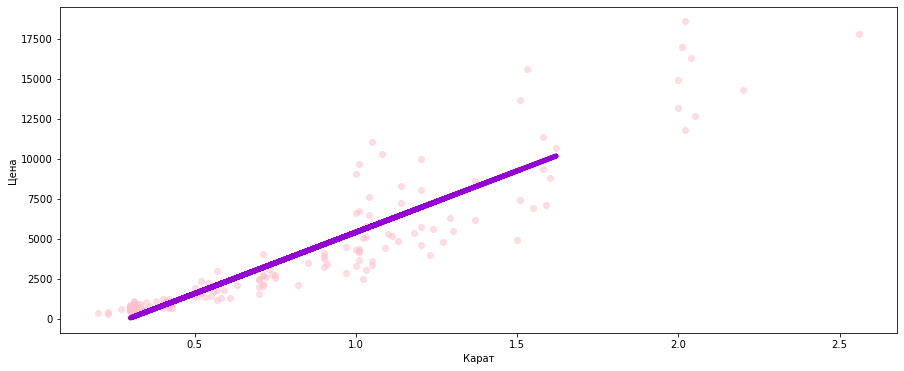

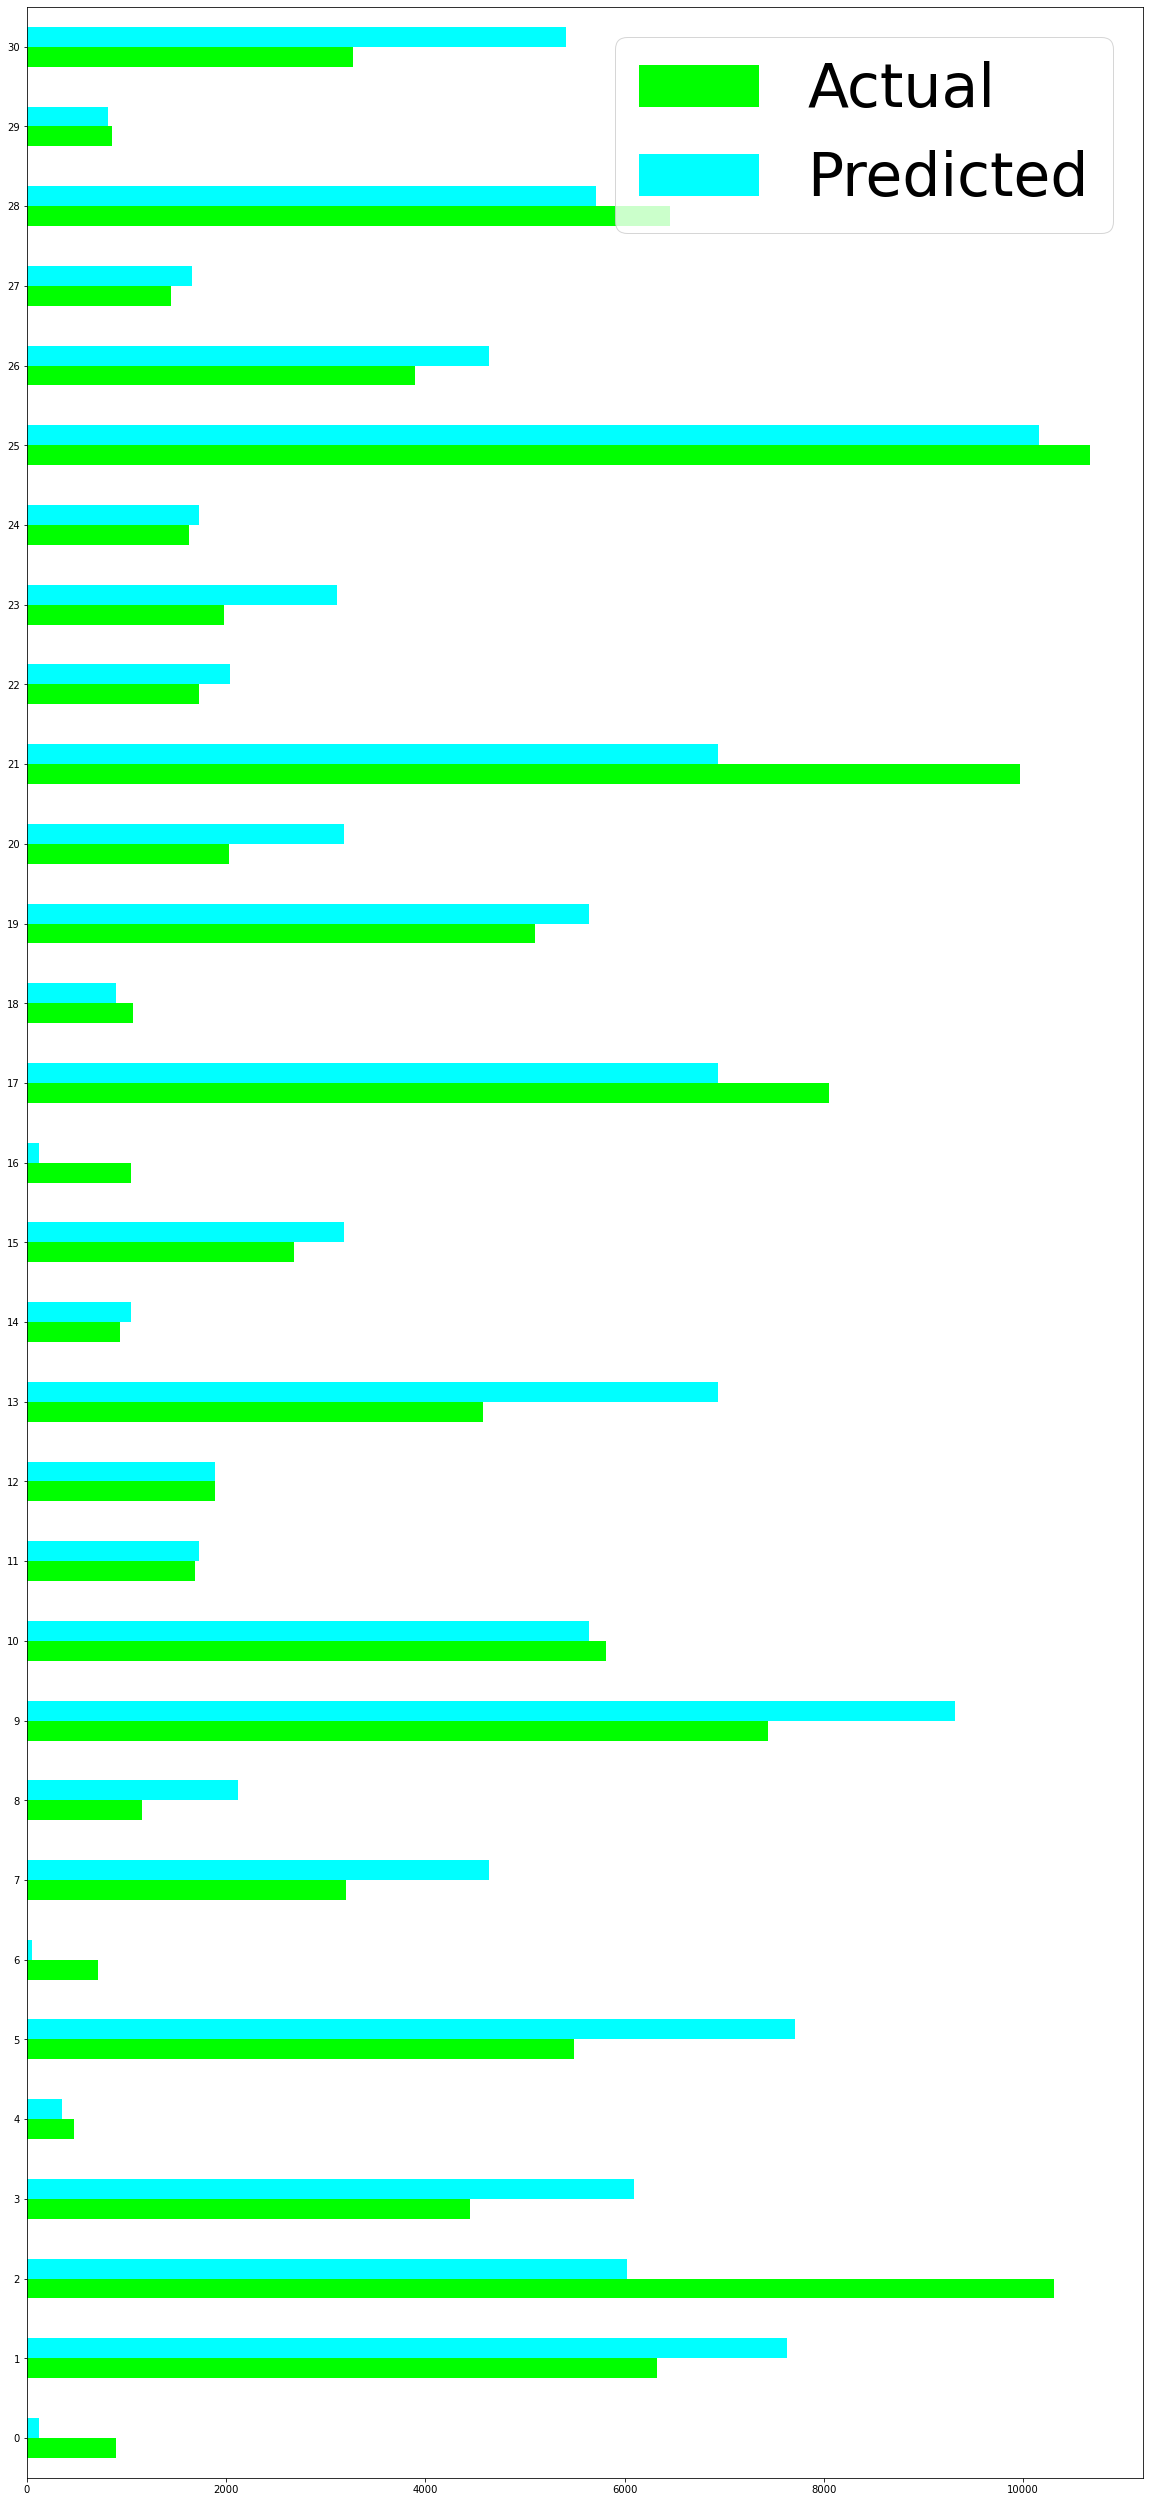

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import itertools
url='https://raw.githubusercontent.com/akmand/datasets/main/diamonds.csv'
dataset=pd.read_csv(url)
fig=plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax_1=fig.add_subplot(2,1,1)
dataset.describe()
index_del=[]
for i in range(1,53939):
    if(i%359!=0):
        index_del.append(i)
dataset=dataset.drop(index=index_del)
print(dataset.head())
print("Размер датафрейма",dataset.shape)
ax_1.scatter(dataset['carat'],dataset['price'],color='pink',alpha = 0.5)
ax_1.set_xlabel("Карат")
ax_1.set_ylabel("Цена")
X=dataset[["carat"]].values
Y=dataset[["price"]].values
regressor=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
np.reshape(X_train,(len(X_train),1))
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
ax_1.plot(X_test,y_pred,color='darkviolet',linewidth=5)
print("Коэффициенты")
print(regressor.intercept_)
print(regressor.coef_)
y_predict=[]
y_testovoe=[]
for i in range(len(y_pred)):
    for j in y_pred[i]:
        y_predict.append(j)
for i in range(len(y_test)):
    for j in y_test[i]:
        y_testovoe.append(j)
s2 = pd.Series(y_predict)
s1=pd.Series(y_testovoe)
df=pd.DataFrame({'Actual':s1,'Predicted':s2})
fig=plt.figure(figsize=(20,100))
ax_2=fig.add_subplot(2,1,2)
my_colors=['lime','cyan']
df.plot(kind='barh',ax=ax_2,color=my_colors)
plt.legend(loc=1,prop={'size':60})
plt.show()

# 4 Задание
Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.

https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv

https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

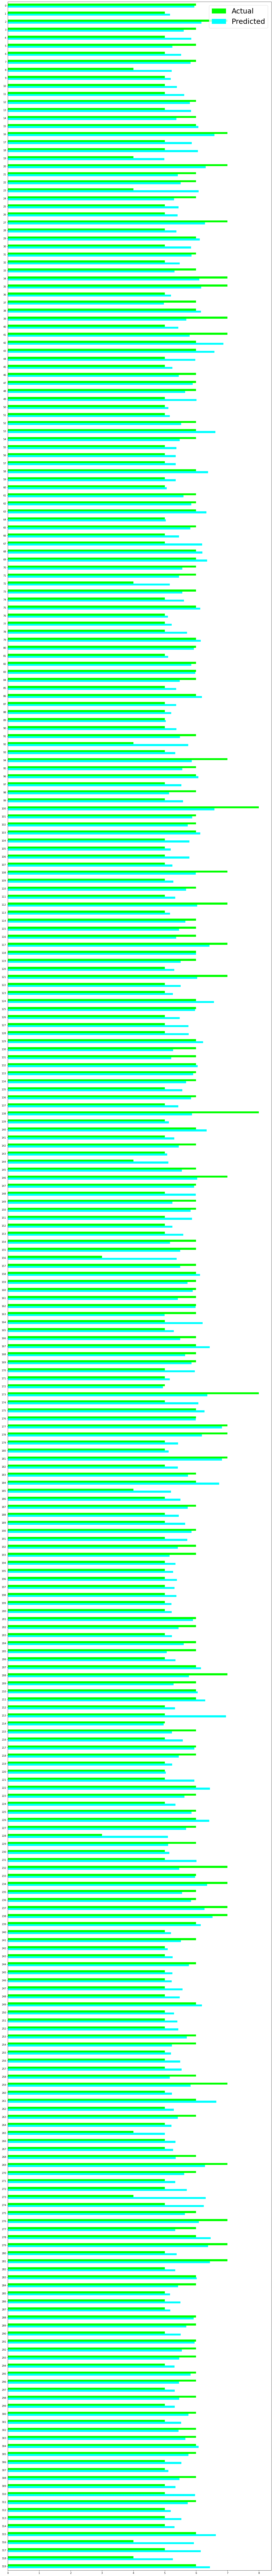

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
url='https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
dataset=pd.read_csv(url)
dataset.describe()
X=dataset[['citric acid','pH','alcohol']]
y=dataset[['quality']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print(dataset.head())
print(dataset.shape)
np.reshape(regressor.coef_,(3,1))
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print('Коэффициенты',linreg)
y_pred=regressor.predict(X_test)
print('Среднеквадратичная ошибка:',metrics.mean_squared_error(y_test,y_pred))
y_predict=[]
y_testovoe=[]
buf=y_test[['quality']].values
for i in range(len(y_pred)):
    for j in y_pred[i]:
        y_predict.append(j)
for i in range(len(buf)):
    for j in buf[i]:
        y_testovoe.append(j)
s2 = pd.Series(y_predict)
s1=pd.Series(y_testovoe)
my_colors=['lime','cyan']
df=pd.DataFrame({'Actual':s1,'Predicted':s2})
fig=plt.figure(figsize=(20,200))
ax_1=fig.add_subplot(1,1,1)
df.plot(kind='barh',ax=ax_1,color=my_colors)
plt.legend(loc=1,prop={'size':30})
plt.gca().invert_yaxis()
plt.show()

# Задача 5*
Экспериментально получены N-значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, апроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов.
Вариант 23-10=13-10=3.

x 3 3,2 3,4 3,6 3,8 4

y 2  3  3  3  2 4

Массив x:  [3.  3.2 3.4 3.6 3.8 4. ]
Массив y:  [2.0, 3.0, 3.0, 3.0, 2.0, 4.0]


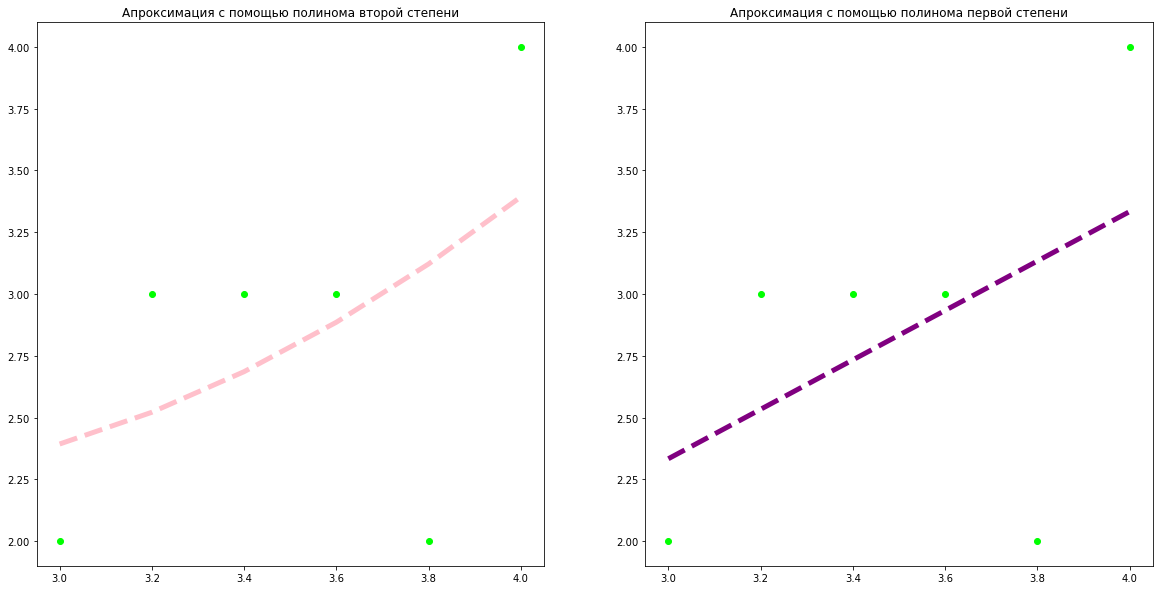

In [33]:
import numpy as np
import random
delta=1.0
x=np.linspace(3.0,4.0,6,True)# возвращает равномерно расположенные числа за 
#указанный интервал, при этом учитывая начальную и  конечную точку интервала
y=[2.0,3.0,3.0,3.0,2.0,4.0]
print('Массив x: ',x)
print('Массив y: ',y)
m1=np.vstack((x*x,x,np.ones(6))).T
m2=np.vstack((x,np.ones(6))).T
s1=np.linalg.lstsq(m1,y,rcond=None)[0]
s2=np.linalg.lstsq(m2,y,rcond=None)[0]
x_prec=np.linspace(3.0,4.0,6,True)
fig=plt.figure(figsize=(20,10))
ax_1=fig.add_subplot(1,2,1)
ax_1.scatter(x,y,c='lime')
ax_1.plot(x_prec,s1[0]*x_prec**2+s1[1]*x_prec+s1[2],color='pink',lw=5,ls='--')
ax_1.set_title('Апроксимация с помощью полинома второй степени')
ax_2=fig.add_subplot(1,2,2)
ax_2.plot(x_prec,s2[0]*x_prec+s2[1],color='purple',lw=5,ls='--')
ax_2.scatter(x,y,c='lime')
ax_2.set_title('Апроксимация с помощью полинома первой степени')
plt.show()